# Support Vector Machines 

### Content

1. [Hard Margin SVM](#Hard-Margin-SVM)
2. [Soft Margin SVM](#Soft-Margin-SVM)
3. [Kernel Methods](#Kernel-Methods) \
    3.1 [Not linearly seperable Data](#Let's-look-at-not-linearly-seperable-data)\
    3.2 [Polynominal Kernel](#Polynominal-Kernel)\
    3.2 [Radial Basis Function](#Radial-Basis-Function-(rbf)) 
4. [Quantum Kernel](#Quantum-Kernel)

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.svm import SVC

from quantum_svm.data.data_generators import create_bipolar_data, create_XOR_data, create_moons_data, create_circles_data, adhoc_dataset
from quantum_svm.svm.linear_classifier import linearSVC
from quantum_svm.svm.nonlinear_classifier import kernelSVC
from quantum_svm.utils.plot import (
    plot_data, 
    plot_confusion_matrix, 
    plot_SVM, 
    plot_datasets, 
    plot_adhoc, 
    plot_kernel_SVC
)
from quantum_svm.utils.utils import accuracy
%load_ext autoreload

%autoreload 2

#### Global Params

In [ ]:

alpha_tol = 1e-04
colors = ['red', 'blue']
cmap_custom = pltcolors.ListedColormap(colors)
cmap = plt.cm.RdBu_r

seed = 12

#### Datasets

In [5]:
# dataset params
params_bipolar_hard = {
    'N': 200, # number of samples
    'D': 2, # number of dimensions
    'C': 2, # number of classes 
    'sigma': 0.5, # std
    'seed': seed,
}

params_bipolar_soft = {
    'N': 200, # number of samples
    'D': 2, # number of dimensions
    'C': 2, # number of classes 
    'sigma': 1.2, # std
    'seed': seed,
}

center = 1
params_xor = {
    'N': 100, # number of samples
    'D': 2, # number of dimensions
    'sigma': 0.4, # std
    'centers': [[center,center], [-center,center], [center,-center], [-center,-center]], 
    'seed': seed,
}


params_circles = {
    'N': 200, # number of samples
    'factor': 0.4, 
    'noise': 0.1,
    'seed': seed,
}

params_moons = {
    'N': 200, # number of samples
    'noise': 0.15,
    'seed': seed,
}

params_adhoc = {
    'train_size': 40,
    'test_size': 10,
    'adhoc_dimension': 2,
    'gap': 0.3,
}

In [6]:
# initialize list of datasets
datasets = [
    create_bipolar_data(
        params_bipolar_hard['N'], 
        params_bipolar_hard['D'], 
        params_bipolar_hard['C'], 
        params_bipolar_hard['sigma'], 
        params_bipolar_hard['seed']
    ),
    create_bipolar_data(
        params_bipolar_soft['N'], 
        params_bipolar_soft['D'], 
        params_bipolar_soft['C'], 
        params_bipolar_soft['sigma'], 
        params_bipolar_soft['seed']
    ),
    create_XOR_data(
        params_xor['N'], 
        params_xor['D'], 
        params_xor['centers'], 
        params_xor['sigma'], 
        params_xor['seed']
    ),
    create_circles_data(
        params_circles['N'], 
        params_circles['factor'], 
        params_circles['noise'], 
        params_circles['seed']
    ),
    create_moons_data(
        params_moons['N'], 
        params_moons['noise'], 
        params_moons['seed']
    ),
    adhoc_dataset(
        params_adhoc['train_size'], 
        params_adhoc['test_size'], 
        params_adhoc['adhoc_dimension'],
        params_adhoc['gap']
    ),
]

plot_titles = [
    'Linearaly Seperable Data - large margin',
    'Linearaly Seperable Data - no margin',
    'XOR Data',
    'Circles Data',
    'Moons Data', 
    'Adhoc Data'
]


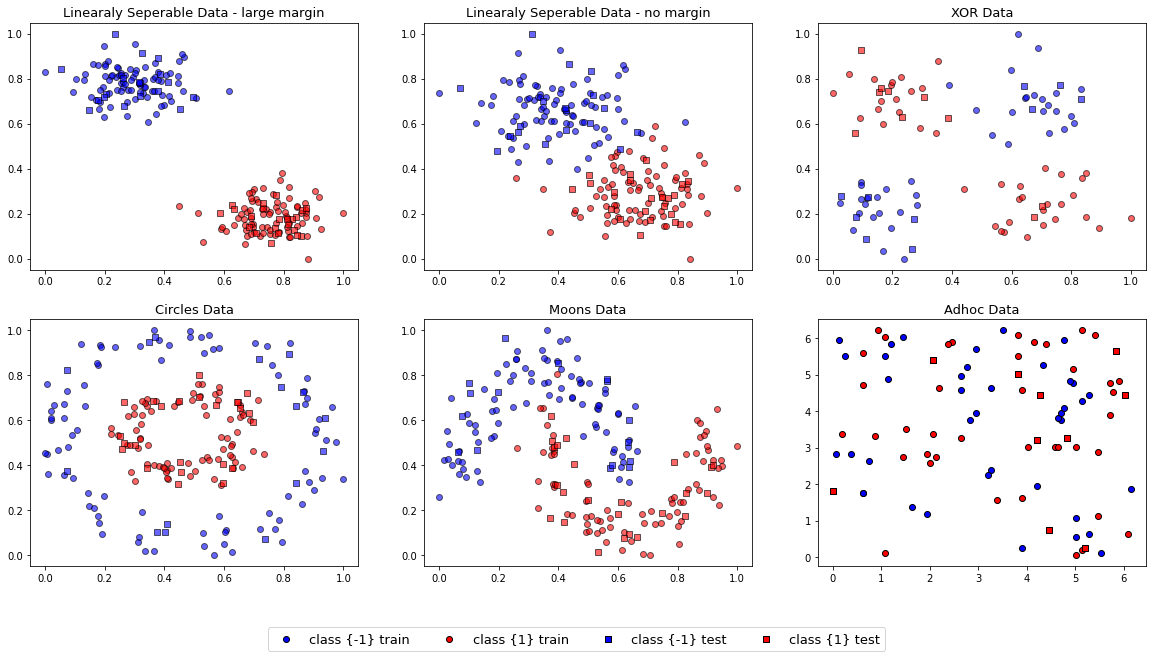

In [7]:
# plots datasets
plot_datasets(datasets, plot_titles)

In [ ]:
#### Base-Line Models 

baseline_hard_margin_SVC = SVC(kernel='linear', C=10000)
baseline_soft_margin_SVC = SVC(kernel='linear', C=10)
baseline_linear_kernel_SVC = SVC(kernel='linear', C=10)
baseline_poly_kernel_SVC = SVC(kernel='poly', C=10, degree=3)
baseline_rbf_kernel_SVC = SVC(kernel='rbf', C=10, gamma=0.5)

## Hard Margin SVM

In [8]:
# Load data
X_bi_train, X_bi_test, y_bi_train, y_bi_test = datasets[0]

# Initialize Model 
hard_margin_SVC = linearSVC()

In [9]:
# Fit Model
hard_margin_SVC.fit(X_bi_train, y_bi_train)
params = hard_margin_SVC.compute_params()

Found 3 Support Vectors out of 160 data points


Weights: [ 2.03731128 -4.75300436]
Bias: 1.1954408506619825
Decision Hyperplane: 0.4286365255878248 * x + 0.25151267684329354 


Accuracy on train set: 100.0 %


In [10]:
# Precict
y_pred_hard_margin = hard_margin_SVC.predict(X_bi_test)

In [11]:
# Baseline
baseline_hard_margin_SVC = SVC(kernel='linear', C=10000)

# Fit
baseline_hard_margin_SVC.fit(X_bi_train, y_bi_train)

SVC(C=10000, kernel='linear')

In [12]:
# Predict
y_pred_baseline_hard_margin = baseline_hard_margin_SVC.predict(X_bi_test)

#Accuracy
baseline_acc_hard_margin= baseline_hard_margin_SVC.score(X_bi_test, y_bi_test)

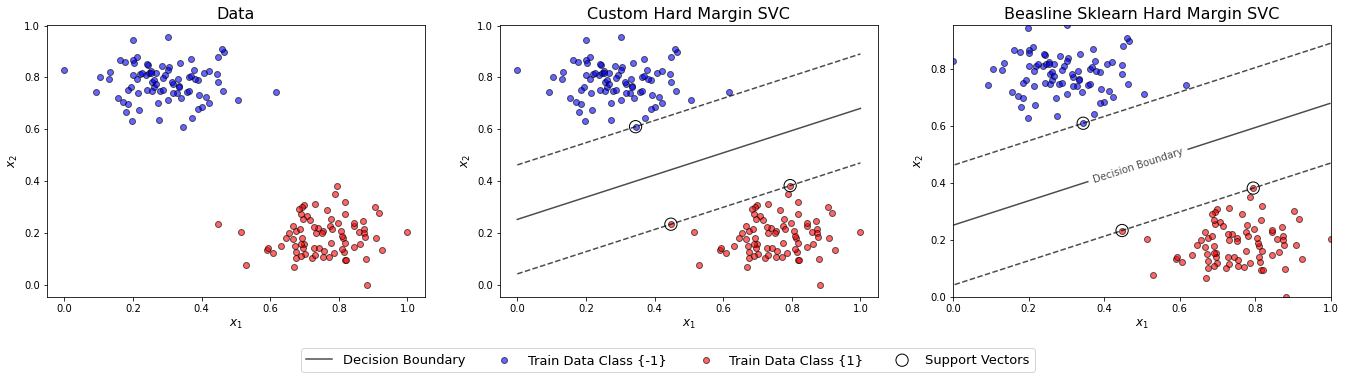

In [14]:
plot_SVM(
    X_bi_train, 
    y_bi_train, 
    params, 
    baseline_hard_margin_SVC, 
    titles = ["Data", "Custom Hard Margin SVC", "Beasline Sklearn Hard Margin SVC"],
    sv=True, 
    hyperplane=True)


In [15]:
# accuracy
accuracy(y_bi_test, y_pred_hard_margin, True, mode='test')
print(f'Baseline Accuracy: {baseline_acc_hard_margin*100} %')


Accuracy on test set: 100.0 %
Baseline Accuracy: 100.0 %


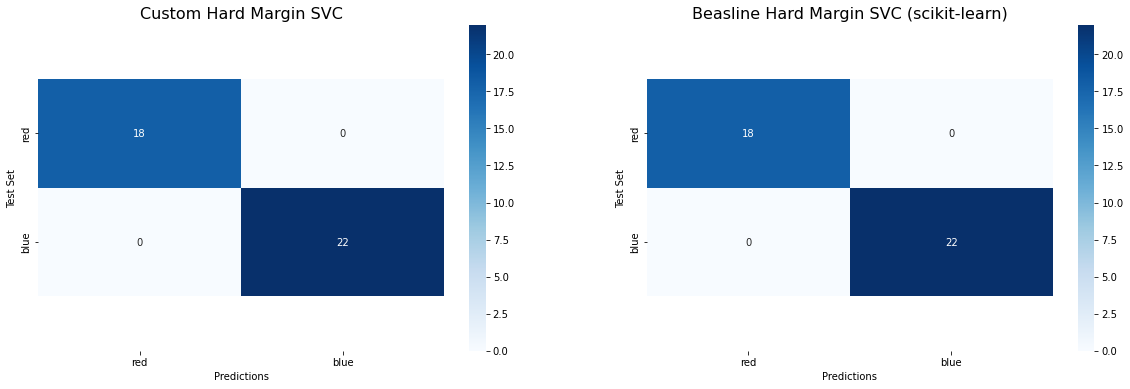

In [16]:
# confusion Matrix plot
plot_confusion_matrix(
    y_bi_test, 
    y_pred_hard_margin,
    y_pred_baseline_hard_margin,
    colors, 
    titles=["Custom Hard Margin SVC", "Beasline Hard Margin SVC (scikit-learn)"]
)

## Soft Margin SVM

In [17]:
# Load Data
X_bi_soft_train, X_bi_soft_test, y_bi_soft_train, y_bi_soft_test = datasets[1]

# Initialize Model
soft_margin_SVC = linearSVC(C=10)

In [18]:
# Fit Model
soft_margin_SVC.fit(X_bi_soft_train, y_bi_soft_train)
params = soft_margin_SVC.compute_params()

Found 24 Support Vectors out of 160 data points


Weights: [ 5.14872057 -8.55166523]
Bias: 1.249749573971498
Decision Hyperplane: 0.6020722791139658 * x + 0.14614107791459807 


Accuracy on train set: 97.5 %


In [19]:
# Predict
y_pred_soft_margin = soft_margin_SVC.predict(X_bi_2_test)

In [20]:
# Baseline 
baseline_soft_margin_SVC = SVC(kernel='linear', C=10)

# Fit
baseline_soft_margin_SVC.fit(X_bi_2_train, y_bi_2_train)

SVC(C=10, kernel='linear')

In [21]:
# Predict
y_pred_baseline_soft_margin = baseline_soft_margin_SVC.predict(X_bi_2_test)

#Accuracy
baseline_acc_soft_margin = baseline_soft_margin_SVC.score(X_bi_2_test, y_bi_2_test)

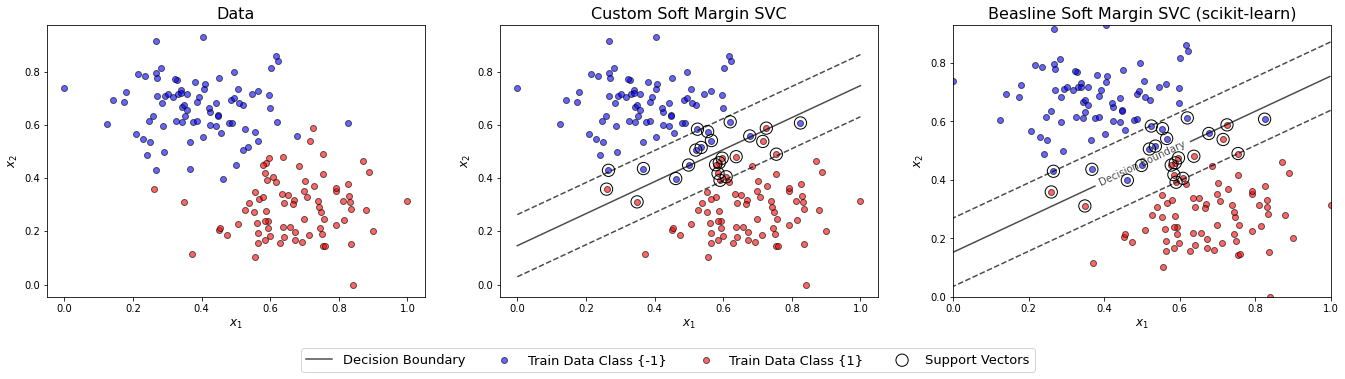

In [22]:
plot_SVM(
    X_bi_2_train, 
    y_bi_2_train,  
    params, 
    baseline_soft_margin_SVC, 
    titles = ["Data", "Custom Soft Margin SVC", "Beasline Soft Margin SVC (scikit-learn)"],
    sv=True, 
    hyperplane=True)

In [25]:
# accuracy

accuracy(y_bi_2_test, y_pred_baseline_soft_margin, True, mode='test')
print(f'Baseline Accuracy: {baseline_acc_soft_margin*100} %')

Accuracy on test set: 97.5 %
Baseline Accuracy: 97.5 %


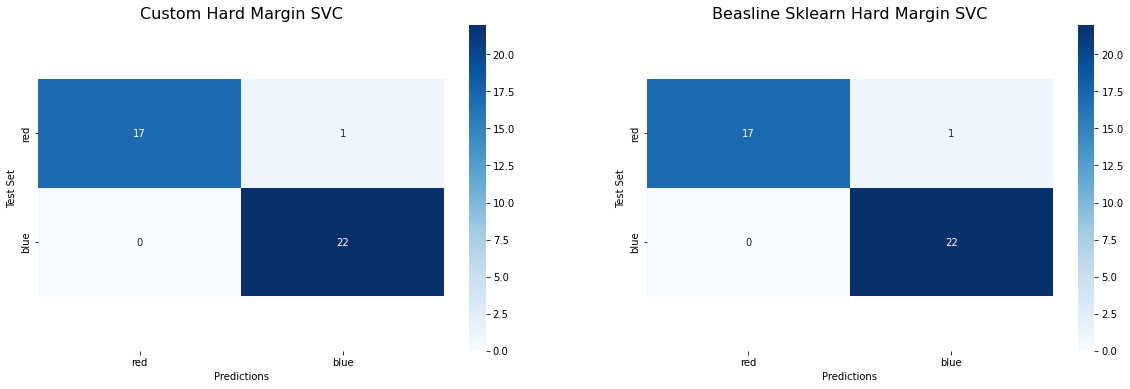

In [26]:
# confusion Matrix plot
plot_confusion_matrix(
    y_bi_2_test, 
    y_pred_soft_margin,
    y_pred_baseline_soft_margin,
    colors, 
    titles=["Custom Soft Margin SVC", "Beasline Soft Margin SVC (scikit-learn)"]
)

## Kernel Methods

The **Kernel Trick** introduce basis functions, $f(\cdot): \mathbb{R}^N \rightarrow \mathbb{R}^M $, that allows the data to be map to a higher dimensinal freature space, **Hilbert Space**, which allows enables an increased classification performance on not linearly seperably data.

#### Let's look at not linearly seperable data

In [27]:
# Load Data
X_xor_train, X_xor_test, y_xor_train, y_xor_test = datasets[2]

# Initialize Model
linear_SVC = kernelSVC(None, kernel='linear', C=10)

SVC(kernel=linear, C=10.0)


In [28]:
# Fit Model
linear_SVC.fit(X_xor_train, y_xor_train)

Found 74 Support Vectors out of 80 data points




100%|██████████████████████████████████████| 80/80 [00:00<00:00, 3528.29batch/s]


Accuracy on training set: 53.75 %


100%|██████████████████████████████████████| 20/20 [00:00<00:00, 1751.31batch/s]


In [29]:
# Predict
y_pred_linear_SVC = linear_SVC.predict(X_xor_test)

100%|██████████████████████████████████████| 20/20 [00:00<00:00, 2606.53batch/s]


In [30]:
# Baseline 
baseline_linear_kernel_SVC = SVC(kernel='linear', C=10)

# Fit
baseline_linear_kernel_SVC.fit(X_xor_train, y_xor_train)

SVC(C=10, kernel='linear')

In [31]:
# predict
y_pred_baseline_soft_margin_xor = baseline_linear_kernel_SVC.predict(X_xor_test)
baseline_acc_soft_margin_xor = baseline_linear_kernel_SVC.score(X_xor_test, y_xor_test)

100%|██████████████████████████████████| 2500/2500 [00:00<00:00, 5667.27batch/s]


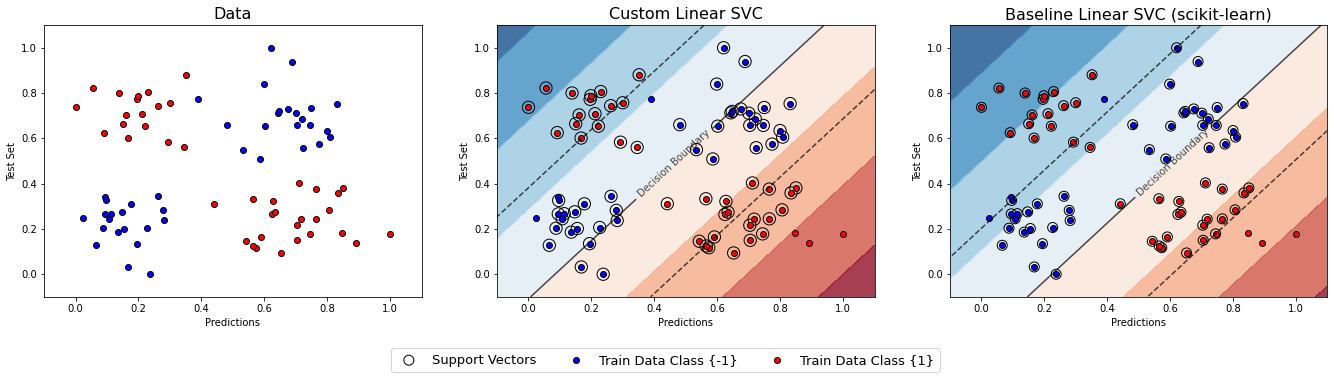

In [35]:
plot_kernel_SVC(
    X_xor_train, 
    y_xor_train, 
    [linear_SVC, baseline_linear_kernel_SVC],
    cmap, 
    titles=["Data", "Custom Linear SVC", "Baseline Linear SVC (scikit-learn)"], 
    kernel='polynominal',
)

In [33]:
# accuracy
accuracy(y_xor_test, y_pred_linear_SVC, True, mode='test')
print(f'Baseline Accuracy: {baseline_acc_soft_margin_xor*100} %')

Accuracy on test set: 35.0 %
Baseline Accuracy: 50.0 %


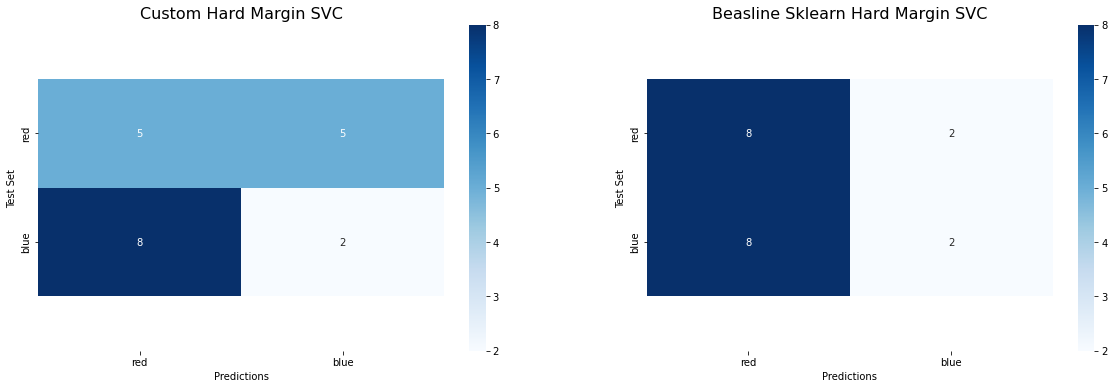

In [36]:
# confusion Matrix plot
plot_confusion_matrix(
    y_xor_test, 
    y_pred_linear_SVC,
    y_pred_baseline_soft_margin_xor,
    colors, 
    titles=["Custom Linear SVC", "Beasline Linear SVC (scikit-learn)"]
)

### Polynominal Kernel

In [38]:
# Initialize Polynominal SVC
polynominal_SVC = kernelSVC(None, kernel='polynominal', C=10, degree=3)

SVC(kernel='polynominal', C=10.0, degree=3)


In [39]:
# Fit Model
polynominal_SVC.fit(X_xor_train, y_xor_train)

Found 22 Support Vectors out of 80 data points




100%|██████████████████████████████████████| 80/80 [00:00<00:00, 8502.54batch/s]


Accuracy on training set: 96.25 %


In [40]:
# Predict
y_xor_pred_poly = polynominal_SVC.predict(X_xor_test)

100%|██████████████████████████████████████| 20/20 [00:00<00:00, 6499.27batch/s]


In [41]:
# Baseline 
baseline_poly_kernel_SVC = SVC(kernel='poly', C=10, degree=3)

# Fit
baseline_poly_kernel_SVC.fit(X_xor_train, y_xor_train)

SVC(C=10, kernel='poly')

In [42]:
# Predict
y_xor_pred_baseline_poly = baseline_poly_kernel_SVC.predict(X_xor_test)

# Accuracy
baseline_acc_poly = baseline_poly_kernel_SVC.score(X_xor_test, y_xor_test)

100%|█████████████████████████████████| 2500/2500 [00:00<00:00, 14672.64batch/s]


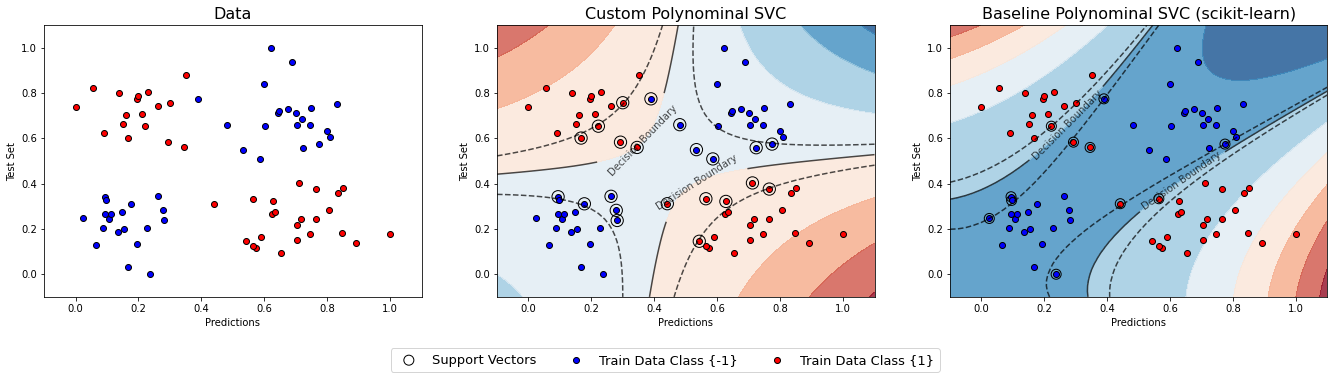

In [43]:
plot_kernel_SVC(
    X_xor_train, 
    y_xor_train, 
    [polynominal_SVC, baseline_poly_kernel_SVC],
    cmap, 
    titles=["Data", "Custom Polynominal SVC", "Baseline Polynominal SVC (scikit-learn)"], 
    kernel='polynominal'
)

In [44]:
# accuracy
accuracy(y_xor_test, y_xor_pred_poly, True, mode='test')
print(f'Baseline Accuracy: {baseline_acc_poly*100} %')

Accuracy on test set: 95.0 %
Baseline Accuracy: 95.0 %


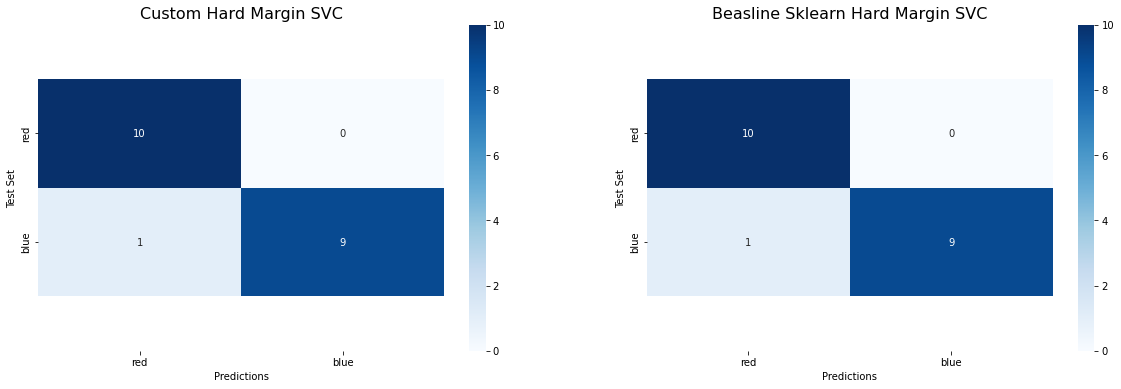

In [45]:
# confusion Matrix plot
plot_confusion_matrix(
    y_xor_test, 
    y_xor_pred_poly,
    y_xor_pred_baseline_poly,
    colors, 
    titles=["Custom Polynominal SVC", "Beasline Sklearn Polynominal SVC"]
)

### Radial Basis Function (rbf)

In [46]:
# Initialize Model
rbf_SVC = kernelSVC(None, kernel='rbf', C=10)

# Fit Model
rbf_SVC.fit(X_xor_train, y_xor_train)

SVC(kernel='rbf', C=10.0, gamma=0.5)
Found 49 Support Vectors out of 80 data points




100%|██████████████████████████████████████| 80/80 [00:00<00:00, 2350.05batch/s]


Accuracy on training set: 98.75 %


In [47]:
# Predict
y_xor_pred_rbf = rbf_SVC.predict(X_xor_test)

100%|██████████████████████████████████████| 20/20 [00:00<00:00, 2251.49batch/s]


In [48]:
# Baseline 
baseline_rbf_kernel_SVC = SVC(kernel='rbf', C=10, gamma=0.5)

# Fit
baseline_rbf_kernel_SVC.fit(X_xor_train, y_xor_train)

SVC(C=10, gamma=0.5)

In [49]:
# Predict
y_xor_pred_baseline_rbf = baseline_rbf_kernel_SVC.predict(X_xor_test)

# Accuracy
baseline_acc_rbf = baseline_rbf_kernel_SVC.score(X_xor_test, y_xor_test)

100%|██████████████████████████████████| 2500/2500 [00:00<00:00, 3556.84batch/s]


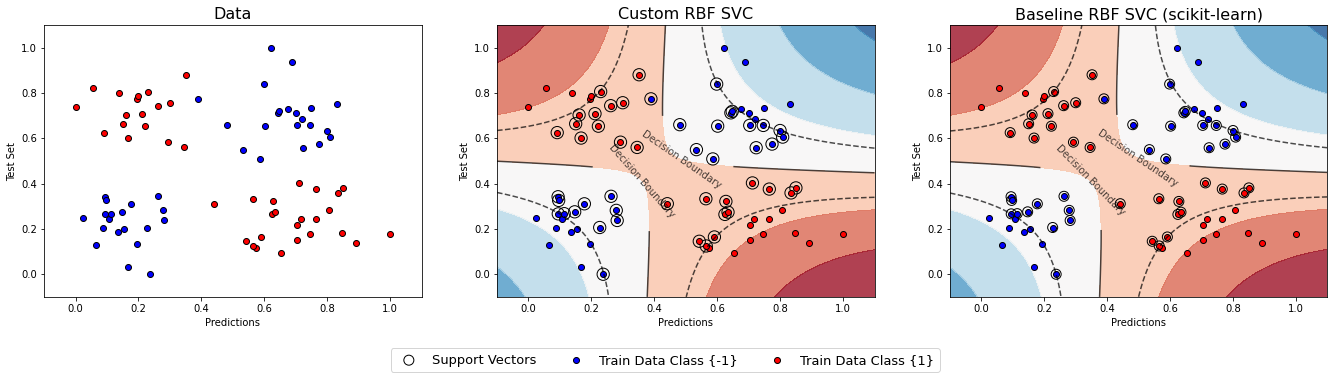

In [50]:
plot_kernel_SVC(
    X_xor_train, 
    y_xor_train, 
    [rbf_SVC, baseline_rbf_kernel_SVC], 
    cmap, 
    titles=["Data", "Custom RBF SVC", "Baseline RBF SVC (scikit-learn)"], 
    kernel='rbf'
)

In [51]:
# accuracy
accuracy(y_xor_test, y_xor_pred_rbf, True, mode='test')
print(f'Baseline Accuracy: {baseline_acc_rbf*100} %')

Accuracy on test set: 100.0 %
Baseline Accuracy: 100.0 %


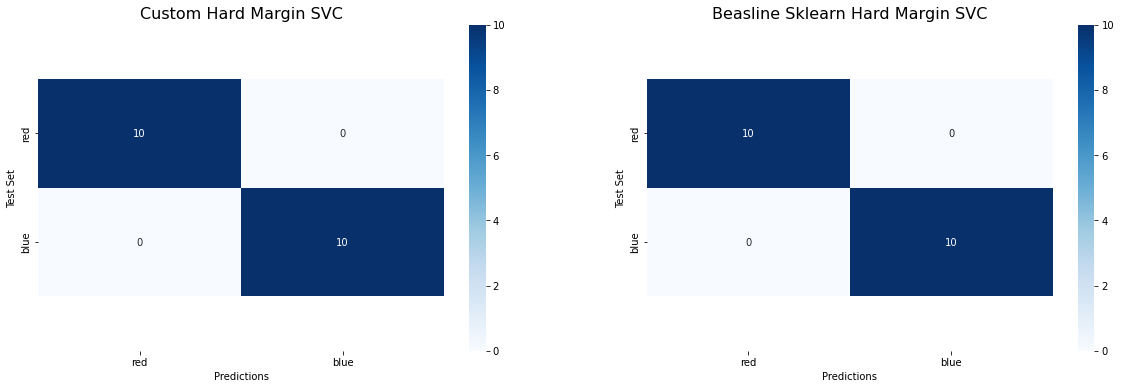

In [52]:
# confusion Matrix plot
plot_confusion_matrix(
    y_xor_test, 
    y_xor_pred_rbf,
    y_xor_pred_baseline_rbf,
    colors, 
    titles=["Custom Hard Margin SVC", "Beasline Sklearn Hard Margin SVC"]
)

### Display Kernels

In [53]:
## get kernel functions
K_linear = linear_SVC.get_kernel_matrix()
K_poly = polynominal_SVC.get_kernel_matrix()
K_rbf = rbf_SVC.get_kernel_matrix()

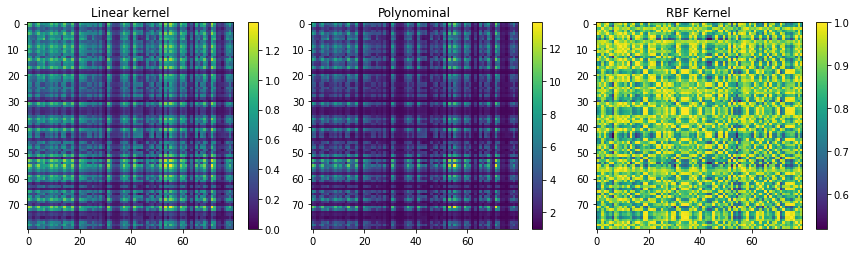

In [114]:
fig, ax = plt.subplots(1, 3, figsize=(12, 12))
im = ax[0].imshow(np.asmatrix(K_linear),
              interpolation='nearest', origin='upper', cmap=plt.cm.viridis)
ax[0].set_title("Linear kernel")
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

im = ax[1].imshow(np.asmatrix(K_poly),
              interpolation='nearest', origin='upper', cmap=plt.cm.viridis)
ax[1].set_title("Polynominal")
divider = make_axes_locatable(ax[1])
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

im = ax[2].imshow(np.asmatrix(K_rbf),
              interpolation='nearest', origin='upper', cmap=plt.cm.viridis)
ax[2].set_title("RBF Kernel")
divider = make_axes_locatable(ax[2])
cax = divider.append_axes("right", size="5%", pad=0.2)
plt.colorbar(im, cax=cax)

fig.tight_layout()
plt.show()

### Quantum Kernel

#### Theory
In order to use a quantum kernel, one needs to transform the classical data to a quantum state.
#### Quantum Feature Maps 
- maps a classical state vector x to a quantum state vector (Hilbert Space)
- this is done by $$ \mathbf{U}_{\Phi}(x) = \prod_d U_{\Phi}(x)\mathbb{H}^{\otimes n}$$
**ZZ Feature Map**
$$ \mathbf{U}_{\Phi}(x) = ( \exp(i \sum_{jk} \phi_{j,k}(x) Z_j \otimes Z_k) \exp(i \sum_{j} \phi_{j}(x) Z_j)  \mathbb{H}^{\otimes n})^d$$
The feature map is realized by a quantum circuit.  
#### Quantum Kernel

$$ k(x_i, x_j) = \Phi^{\dagger}(x_i) \Phi(x_j)$$ 
for finite data:
$$ K_{ij} = |<\Phi^{\dagger}(x_i)|\Phi(x_j)>|^2 $$

$$|\Phi(x_j)> = U_{\theta}(x_j)|0^{\otimes n}>$$

to calculate each element --> calc the transition amplitude 
$$ |<\Phi^{\dagger}(x_i)|\Phi(x_j)>|^2 = |<0^{\otimes n}|U_{\theta}^{\dagger}(x_i)|U_{\theta}(x_j)|0^{\otimes n}>|^2$$

In [95]:
from qiskit.circuit.library import ZZFeatureMap, PauliFeatureMap, ZFeatureMap
from qiskit import Aer

from quantum_svm.quantum.quantum_kernels import quantum_kernel
from quantum_svm.quantum.kernels import QuantumKernel
from quantum_svm.quantum.feature_maps import ZZFeatureMap as ZZFeatureMap_custom 

In [ ]:
from quantum_svm.quantum.kernels import QuantumKernel as QK_custom
quantum_params = {
    'feature_dimension': 2,
    'reps': 2,
    'seed': 1024,
    'shots': 2**14,   
    'provider_backend': None,
}

zz_map_test = ZZMap_custom(quantum_params['feature_dimension'], quantum_params['reps'], insert_barriers=True)

print(zz_map_test)

backend = Aer.get_backend('qasm_simulator')
zz_kernel = QK_custom(feature_map=zz_map_test, quantum_backend=backend, sim_params=quantum_params)
circuits = []
for i in range(X.shape[0]):
    for j in range(X.shape[0]):
        circuits.append(zz_kernel.construct_circuit(X[i], X[j]))
        
circuits[1].decompose().decompose().draw('mpl')

QK_custom = zz_kernel.evaluate(X)
QK_custom